In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from database import *


In [5]:
batch_size = 1

mr = ModelReader(batch_size)

Connecting to the PostgreSQL database...


In [6]:
batch = mr.getGraspBatch()

one_grasp = batch[0]
params = config(section='data')

scale, model_path, grasp_rescale = mr.getModelInfo(one_grasp["scaled_model_id"])
#model_file = open(params['model_dir'] + model_path)
from pyntcloud import PyntCloud
m = PyntCloud.from_file(params['model_dir'] + model_path)

#pt_cld = m.points.values
pt_cld = m.get_sample("mesh_random", n=10000, rgb=False, normals=False).values
contacts = np.array(one_grasp['grasp_contacts']).reshape(-1, 3)

TypeError: must be str, not float

In [11]:
# grasp_grasp_joints and grasp_grasp_position contain the information necessary to recreate the grasp.


#  grasp_grasp_joints    
#     Joint angles for the grasp.
    
#  grasp_grasp_position  
# World coordinates and quaternion representing the position and orientation of the hand (X, Y, Z, qW, qX, qY, qZ) for the grasp.

    
# BARRETT_RUBBER  |       1
#  BARRETT_WOOD    |       2
#  HUMAN           |       4 (what we're doing, 20 dof)
#  WILLOW_GRIPPER  |       5
#  BARRETT_PLASTIC |       3
#  MC_GRIP         |       6
# (6 rows)

            


In [12]:
angles = np.array(one_grasp['grasp_grasp_joints'])[1:]
#a[1:] *= 180./np.pi
#a[1:].reshape(5, -1)
#first one seems to be always 5 (confirmed, probably number of fingers)
#need to know start of each finger and length of each digit though


In [13]:
one_grasp['grasp_grasp_position']
#first one always 0? (0, x, y, z, then 4d quaternion)
#first one 0 confirmed (meaning???)

[0.0, 102.81, 25.7836, 0.168536, 0.970675, -0.173423, 0.002099, 0.166462]

In [36]:
start

array([[102.81    ,  25.7836  ,   0.168536]])

In [43]:
def genR(x=0, y=0, z=0):
    Rx = np.eye(3)
    Rx[1, 1] = np.cos(x)
    Rx[1, 2] = -np.sin(x)
    Rx[2, 1] = np.sin(x)
    Rx[2, 2] = np.cos(x)
    
    Ry = np.eye(3)
    Ry[0, 0] = np.cos(x)
    Ry[0, 2] = np.sin(x)
    Ry[2, 0] = -np.sin(x)
    Ry[2, 2] = np.cos(x)
    
    Rz = np.eye(3)
    Rz[0, 0] = np.cos(x)
    Rz[0, 1] = -np.sin(x)
    Rz[1, 0] = np.sin(x)
    Rz[1, 1] = np.cos(x)
    
    R = Rz @ Ry @ Rx
    return R

In [54]:
hand_pts.shape

(1, 18)

<IPython.core.display.Javascript object>


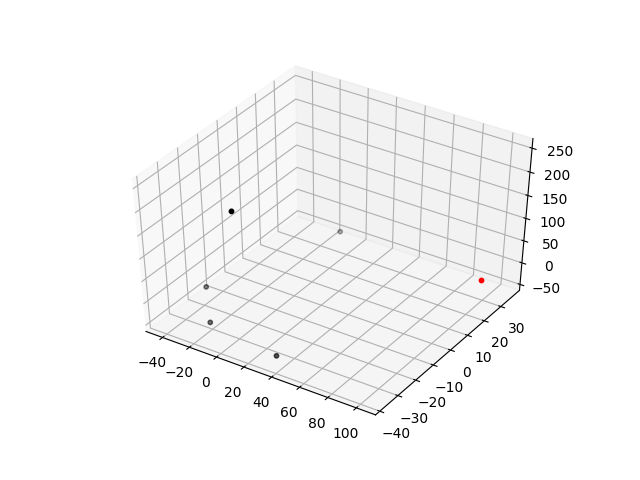

In [56]:
start = np.array(one_grasp['grasp_grasp_position'])[np.newaxis, 1:4].T
hand_pts = []

deg2rad = np.pi / 180.

Rx = genR(-90 * deg2rad)
Rt = np.array([-0.1486, -0.9003, 0.4089, 0.2665, 0.3618, 0.8933, -0.9522, 0.2418, 0.1862]).reshape(3, 3)


hand_pts.append(start)
hand_pts.append(Rx @ (start + np.array([[-140.0599, 11.2048, 36.4156]]).T))
hand_pts.append(Rx @ (start + np.array([[145.6623, 11.2048, 8.4036]]).T))
hand_pts.append(Rx @ (start + np.array([[-145.6623, 5.6025, -19.6084]]).T))
hand_pts.append(Rx @ (start + np.array([[-134.4575, -8.4035, -42.0180]]).T))
hand_pts.append(Rt @ (start + np.array([[-50.6241, -11.5082, 18.9317]]).T))

hand_pts = np.concatenate(hand_pts, axis=1).T

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hand_pts[0, 0], hand_pts[0, 1], hand_pts[0, 2], zdir='z', c= 'red', s=10)
ax.scatter(hand_pts[1:, 0], hand_pts[1:, 1], hand_pts[1:, 2], zdir='z', c= 'black', s=10)

plt.show()


In [50]:

    
np.array([-140.0599, 11.2048, 36.4156]).shape


(3,)

In [ ]:
 <chain>
        <transform>
            <translation>-140.0599 11.2048 36.4156</translation>
            <rotation>-90 x</rotation>
        </transform>
        <joint type="Revolute">
            <theta>d0</theta>
            <d>0</d>
            <a>0</a>
            <alpha>90</alpha>
            <minValue>-20</minValue>
            <maxValue>20</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d1</theta>
            <d>0</d>
            <a>-43.19</a>
            <alpha>0</alpha>
            <minValue>-10</minValue>
            <maxValue>90</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d2</theta>
            <d>0</d>
            <a>-29.56</a>
            <alpha>0</alpha>
            <minValue>-10</minValue>
            <maxValue>90</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d3</theta>
            <d>0</d>
            <a>-25.35</a>
            <alpha>0</alpha>
            <minValue>-10</minValue>
            <maxValue>90</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <link dynamicJointType="Universal">index1.xml</link>
        <link dynamicJointType="Revolute">index2.xml</link>
        <link dynamicJointType="Revolute">index3.xml</link>
    </chain>
    <chain>
        <transform>
            <translation>-145.6623 11.2048 8.4036</translation>
            <rotation>-90 x</rotation>
        </transform>
        <joint type="Revolute">
            <theta>d4</theta>
            <d>0</d>
            <a>0</a>
            <alpha>90</alpha>
            <minValue>-10</minValue>
            <maxValue>10</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d5</theta>
            <d>0</d>
            <a>-46.20</a>
            <alpha>0</alpha>
            <minValue>-10</minValue>
            <maxValue>90</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d6</theta>
            <d>0</d>
            <a>-30.99</a>
            <alpha>0</alpha>
            <minValue>-10</minValue>
            <maxValue>90</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d7</theta>
            <d>0</d>
            <a>-29.20</a>
            <alpha>0</alpha>
            <minValue>-10</minValue>
            <maxValue>90</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <link dynamicJointType="Universal">mid1.xml</link>
        <link dynamicJointType="Revolute">mid2.xml</link>
        <link dynamicJointType="Revolute">mid3.xml</link>
    </chain>
    <chain>
        <transform>
            <translation>-145.6623 5.6025 -19.6084</translation>
            <rotation>-90 x</rotation>
        </transform>
        <joint type="Revolute">
            <theta>d8</theta>
            <d>0</d>
            <a>0</a>
            <alpha>90</alpha>
            <minValue>-20</minValue>
            <maxValue>20</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d9</theta>
            <d>0</d>
            <a>-39.12</a>
            <alpha>0</alpha>
            <minValue>-10</minValue>
            <maxValue>90</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d10</theta>
            <d>0</d>
            <a>-28.31</a>
            <alpha>0</alpha>
            <minValue>-10</minValue>
            <maxValue>90</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d11</theta>
            <d>0</d>
            <a>-24.48</a>
            <alpha>0</alpha>
            <minValue>-10</minValue>
            <maxValue>90</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <link dynamicJointType="Universal">ring1.xml</link>
        <link dynamicJointType="Revolute">ring2.xml</link>
        <link dynamicJointType="Revolute">ring3.xml</link>
    </chain>
    <chain>
        <transform>
            <translation>-134.4575 -8.4035 -42.0180</translation>
            <rotation>-90 x</rotation>
        </transform>
        <joint type="Revolute">
            <theta>d12</theta>
            <d>0</d>
            <a>0</a>
            <alpha>90</alpha>
            <minValue>-30</minValue>
            <maxValue>30</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d13</theta>
            <d>0</d>
            <a>-29.91</a>
            <alpha>0</alpha>
            <minValue>-10</minValue>
            <maxValue>90</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d14</theta>
            <d>0</d>
            <a>-21.10</a>
            <alpha>0</alpha>
            <minValue>-10</minValue>
            <maxValue>90</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d15</theta>
            <d>0</d>
            <a>-23.16</a>
            <alpha>0</alpha>
            <minValue>-10</minValue>
            <maxValue>90</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <link dynamicJointType="Universal">pinky1.xml</link>
        <link dynamicJointType="Revolute">pinky2.xml</link>
        <link dynamicJointType="Revolute">pinky3.xml</link>
    </chain>
    <chain>
        <transform>
            <translation>-50.6241 -11.5082 18.9317</translation>
            <rotationMatrix>-0.1486 -0.9003 0.4089 0.2665 0.3618 0.8933 -0.9522 0.2418 0.1862</rotationMatrix>
        </transform>
        <joint type="Revolute">
            <theta>d16</theta>
            <d>0.0</d>
            <a>0.0</a>
            <alpha>90.0</alpha>
            <minValue>-10</minValue>
            <maxValue>70</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d17+49.5</theta>
            <d>0.0</d>
            <a>52.1193</a>
            <alpha>44.0</alpha>
            <minValue>-50</minValue>
            <maxValue>25</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d18+5.0</theta>
            <d>0.0</d>
            <a>40.7638</a>
            <alpha>0.0</alpha>
            <minValue>0</minValue>
            <maxValue>90</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <joint type="Revolute">
            <theta>d19+85.0</theta>
            <d>0.0</d>
            <a>0.0</a>
            <alpha>90.0</alpha>
            <minValue>0</minValue>
            <maxValue>100</maxValue>
            <viscousFriction>5.0e+7</viscousFriction>
        </joint>
        <link dynamicJointType="Universal">thumb1.xml</link>
        <link dynamicJointType="Revolute">thumb2.xml</link>
        <link dynamicJointType="Revolute">thumb3.xml</link>
    </chain>

In [14]:
#so we have the starting position (x, y, z), seems to correspond to grasp_rescale and regular rescaled point cloud
#we have orientation of hand
#we have angle of 4 joints for each finger (our hand only really has 3 joints finger though?)
#don't know length of each digit or default orientation (0 degree rotation) for each one



In [15]:
print(scale, grasp_rescale)

1.0 254.0


In [16]:
pt_cld *= grasp_rescale
#pt_cld *= scale

start = np.array(one_grasp['grasp_grasp_position'])[1:4]


<IPython.core.display.Javascript object>


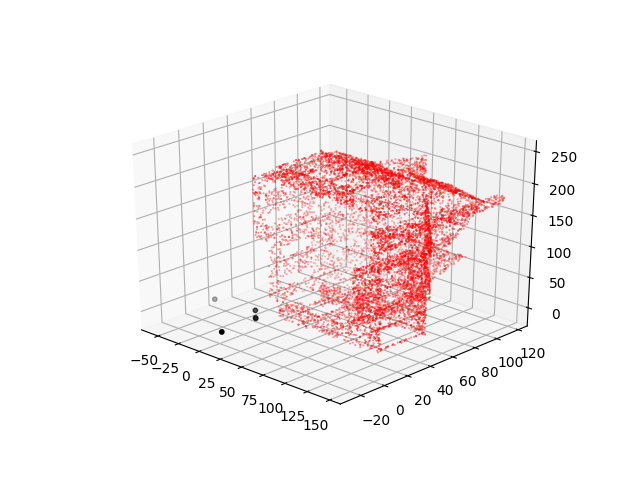

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pt_cld[:, 0], pt_cld[:, 1], pt_cld[:, 2], zdir='z', c= 'red', s=0.1)

#ax.scatter(start[0], start[1], start[2], zdir='z', c= 'black', s=10)

ax.scatter(contacts[:, 0], contacts[:, 1], contacts[:, 2], zdir='z', c= 'black', s=10)
plt.show()

In [ ]:
import open3d as o3
from open3d import JVisualizer


pcd = o3.PointCloud()
pcd.points = o3.Vector3dVector(pt_cld)

#o3.draw_geometries([pcd])
visualizer = JVisualizer()
visualizer.add_geometry(pcd)
visualizer.show()
#plt.show()



In [113]:
pt_cld

array([[ 29.082365 ,  90.02934  ,   7.9593754],
       [ 29.082365 ,  86.29808  ,   9.203214 ],
       [ 29.082365 , 101.84574  ,  67.66242  ],
       ...,
       [ 66.304474 ,  43.207623 , 159.6752   ],
       [ 66.06794  ,  45.396465 , 159.81204  ],
       [ 65.82918  ,  47.585632 , 159.94888  ]], dtype=float32)

In [32]:
one_grasp['grasp_contacts']
#some grasps have 18 others have 21??? (possibly any multiple of 3 up to some max number? (which ones correspond to which?))

[-92.728,
 -27.9784,
 -33.6592,
 0.108787,
 -6.81517,
 0.437217,
 2.804,
 -5.14142,
 0.568641,
 -2.23503,
 -3.57727,
 -3.54212,
 6.74051,
 -8.73263,
 -4.1116,
 8.50499,
 5.21723,
 24.7999]

In [ ]:
#TODO, number of contact points???, how to scale grasp_contacts to match object???

In [2]:
one_grasp

NameError: name 'one_grasp' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
loss = np.array([0.8807
, 0.7433
, 0.6575
, 0.6327
, 0.6209
, 0.5670
, 0.5286
, 0.5000
, 0.4731
, 0.4472
, 0.4208
, 0.3986
, 0.3793
, 0.3606
, 0.3459
, 0.3304
, 0.3160
, 0.3026
, 0.2903
, 0.2796
, 0.2690
, 0.2593
, 0.2504
, 0.2421
, 0.2343
, 0.2271
, 0.2199
, 0.2134
, 0.2073
, 0.2013
, 0.1959
, 0.1907
, 0.1857
, 0.1809
, 0.1764
, 0.1722
, 0.1682
, 0.1643
, 0.1606
, 0.1570
, 0.1538
, 0.1505
, 0.1473
, 0.1445
, 0.1417
, 0.1389
, 0.1363
, 0.1338
, 0.1313
, 0.1290
, 0.1267
, 0.1245
, 0.1224
, 0.1204
, 0.1184
, 0.1165
, 0.1148
, 0.1133
, 0.1116
, 0.1099
, 0.1083
, 0.1068
, 0.1053
, 0.1038
, 0.1024
, 0.1011
, 0.0999
, 0.0985
, 0.0973
, 0.0960
, 0.0949
, 0.0937
, 0.0925
, 0.0915
, 0.0904
, 0.0893
, 0.0883
, 0.0873
, 0.0863
, 0.0853
, 0.0843
, 0.0835
, 0.0826
, 0.0817
, 0.0809
, 0.0800
, 0.0793
, 0.0786
, 0.0778
, 0.0770
, 0.0763
, 0.0756
, 0.0749
, 0.0742
, 0.0735
, 0.0729
, 0.0723
, 0.0717
, 0.0711
, 0.0705
, 0.0699
, 0.0693
, 0.0687
, 0.0682
, 0.0676
, 0.0670
, 0.0665
, 0.0660
, 0.0655
, 0.0650
, 0.0645
, 0.0640
, 0.0636
, 0.0632
, 0.0627
, 0.0622
, 0.0618
, 0.0613
, 0.0609
, 0.0605
, 0.0601
, 0.0597
, 0.0593
, 0.0588
, 0.0585
, 0.0581
, 0.0577
, 0.0574
, 0.0570
, 0.0566
, 0.0563
, 0.0560
, 0.0556
, 0.0553
, 0.0549
, 0.0546
, 0.0543
, 0.0539
, 0.0536
, 0.0532
, 0.0529
, 0.0526
, 0.0523
, 0.0520
, 0.0517
, 0.0513
, 0.0510
, 0.0508
, 0.0505
, 0.0502
, 0.0500
, 0.0497
, 0.0494
, 0.0492
, 0.0489
, 0.0486
, 0.0483
, 0.0481
, 0.0478
, 0.0475
, 0.0473
, 0.0470
, 0.0468
, 0.0465
, 0.0463
, 0.0460
, 0.0458
, 0.0456
, 0.0453
, 0.0451
, 0.0449
, 0.0447
, 0.0445
, 0.0443
, 0.0441
, 0.0439
, 0.0437
, 0.0435
, 0.0433
, 0.0431
, 0.0429
, 0.0427
, 0.0425
, 0.0423
, 0.0422
, 0.0420
, 0.0418
, 0.0416
, 0.0414
, 0.0412
, 0.0411
, 0.0409
, 0.0407
, 0.0406
, 0.0404
, 0.0402
, 0.0400
, 0.0399
, 0.0397
, 0.0395
, 0.0394
, 0.0392
, 0.0390
, 0.0389
, 0.0387
, 0.0386
, 0.0384
, 0.0383
, 0.0381
, 0.0380
, 0.0378
, 0.0377
, 0.0375
, 0.0374
, 0.0373
, 0.0371
, 0.0370
, 0.0369
, 0.0368
, 0.0366
, 0.0365
, 0.0363
, 0.0362
, 0.0360
, 0.0359
, 0.0358
, 0.0356
, 0.0355
, 0.0354
, 0.0352
, 0.0351
, 0.0350
, 0.0349
, 0.0347
, 0.0346
, 0.0345
, 0.0344
, 0.0342
, 0.0341
, 0.0340
, 0.0339
, 0.0338
, 0.0336
, 0.0335
, 0.0334
, 0.0333
, 0.0332
, 0.0331
, 0.0330
, 0.0329
, 0.0328
, 0.0327
, 0.0326
, 0.0325
, 0.0324
, 0.0323
, 0.0322
, 0.0321
, 0.0320
, 0.0319
, 0.0318
, 0.0317
, 0.0316
, 0.0315
, 0.0314
, 0.0313
, 0.0312
, 0.0311
, 0.0310
, 0.0309
, 0.0308
, 0.0307
, 0.0306
, 0.0305
, 0.0305
, 0.0304
, 0.0303
, 0.0302
, 0.0301
, 0.0300
, 0.0299
, 0.0298
, 0.0297
, 0.0296
, 0.0296
, 0.0295
, 0.0294
, 0.0293
, 0.0292
, 0.0292
, 0.0291
, 0.0290
, 0.0289
, 0.0288
, 0.0287
, 0.0287
, 0.0286
, 0.0285
, 0.0284
, 0.0283
, 0.0282
, 0.0282
, 0.0281
, 0.0280
, 0.0279
, 0.0279
, 0.0278
, 0.0277
, 0.0276
, 0.0276
, 0.0275
, 0.0274
, 0.0274
, 0.0273
, 0.0272
, 0.0272
, 0.0271
, 0.0270
, 0.0269
, 0.0269
, 0.0268
, 0.0267
, 0.0267
, 0.0266
, 0.0265
, 0.0265
, 0.0264
, 0.0263
, 0.0263
, 0.0262
, 0.0261
, 0.0261
, 0.0260
, 0.0259
, 0.0259
, 0.0258
, 0.0257
, 0.0257
, 0.0256
, 0.0256
, 0.0255
, 0.0255
, 0.0254
, 0.0253
, 0.0253
, 0.0252
, 0.0252
, 0.0251
, 0.0250
, 0.0250
, 0.0249
, 0.0249
, 0.0248
, 0.0248
, 0.0247
, 0.0246
, 0.0246
, 0.0245
, 0.0245
, 0.0244
, 0.0244
, 0.0243
, 0.0243
, 0.0242
, 0.0242
, 0.0241
, 0.0241
, 0.0240
, 0.0240
, 0.0239
, 0.0239
, 0.0238
, 0.0238
, 0.0237
, 0.0237
, 0.0236
, 0.0236
, 0.0235
, 0.0235
, 0.0234
, 0.0234
, 0.0233
, 0.0233
, 0.0232
, 0.0232
, 0.0232
, 0.0231
, 0.0231
, 0.0230
, 0.0230
, 0.0229
, 0.0229
, 0.0228
, 0.0228
, 0.0228
, 0.0227
, 0.0227
, 0.0226
, 0.0226
, 0.0225
, 0.0225
, 0.0224
, 0.0224
, 0.0224
, 0.0223
, 0.0223
, 0.0222
, 0.0222
, 0.0222
, 0.0221
, 0.0221
, 0.0220
, 0.0220
, 0.0219
, 0.0219
, 0.0218
, 0.0218
, 0.0218
, 0.0217
, 0.0217
, 0.0216
, 0.0216
, 0.0216
, 0.0215
, 0.0215
, 0.0214
, 0.0214
, 0.0214
, 0.0213
, 0.0213
, 0.0212
, 0.0212
, 0.0212
, 0.0211
, 0.0211
, 0.0210
, 0.0210
, 0.0210
, 0.0209
, 0.0209
, 0.0208
, 0.0208
, 0.0208
, 0.0207
, 0.0207
, 0.0207
, 0.0206
, 0.0206
, 0.0206
, 0.0205
, 0.0205
, 0.0205
, 0.0204
, 0.0204
, 0.0203
, 0.0203
, 0.0203
, 0.0203
, 0.0202
, 0.0202
, 0.0202
, 0.0201
, 0.0201
, 0.0200
, 0.0200
, 0.0200
, 0.0199
, 0.0199
, 0.0199
, 0.0199
, 0.0198
, 0.0198
, 0.0198
, 0.0197
, 0.0197
, 0.0197
, 0.0196
, 0.0196
, 0.0196
, 0.0195
, 0.0195
, 0.0195
, 0.0194
, 0.0194
, 0.0194
, 0.0194
, 0.0193
, 0.0193
, 0.0193
, 0.0193
, 0.0192
, 0.0192
, 0.0192
, 0.0191
, 0.0191
, 0.0191
, 0.0190
, 0.0190
, 0.0190
, 0.0190
, 0.0189
, 0.0189
, 0.0189
, 0.0189
, 0.0188
, 0.0188
, 0.0188
, 0.0187
, 0.0187
, 0.0187
, 0.0187
, 0.0187
, 0.0186
, 0.0186
, 0.0186
, 0.0185
, 0.0185
, 0.0185
, 0.0185
, 0.0184
, 0.0184
, 0.0184
, 0.0184
, 0.0183
, 0.0183
, 0.0183
, 0.0182
, 0.0182
, 0.0182
, 0.0182
, 0.0181
, 0.0181
, 0.0181
, 0.0181
, 0.0180
, 0.0180
, 0.0180
, 0.0180
, 0.0179
, 0.0179
, 0.0179
, 0.0178
, 0.0178
, 0.0178
, 0.0178
, 0.0178
, 0.0177
, 0.0177
, 0.0177
, 0.0177
, 0.0177
, 0.0176
, 0.0176
, 0.0176
, 0.0176
, 0.0175
, 0.0175
, 0.0175
, 0.0175
, 0.0174
, 0.0174
, 0.0174
, 0.0174
, 0.0174
, 0.0173
, 0.0173
, 0.0173
, 0.0173
, 0.0172
, 0.0172
, 0.0172
, 0.0172
, 0.0172
, 0.0172
, 0.0171
, 0.0171
, 0.0171
, 0.0171
, 0.0170
, 0.0170
, 0.0170
, 0.0170
, 0.0170
, 0.0169
, 0.0169
, 0.0169
, 0.0169
, 0.0169
, 0.0168
, 0.0168
, 0.0168
, 0.0168
, 0.0168
, 0.0167
, 0.0167
, 0.0167
, 0.0167
, 0.0167
, 0.0166
, 0.0166
, 0.0166
, 0.0166
, 0.0166
, 0.0165
, 0.0165
, 0.0165
, 0.0165
, 0.0165
, 0.0165
, 0.0164
, 0.0164
, 0.0164
, 0.0164
, 0.0164
, 0.0163
, 0.0163
, 0.0163
, 0.0163
, 0.0163
, 0.0162
, 0.0162
, 0.0162
, 0.0162
, 0.0162
, 0.0162
, 0.0161
, 0.0161
, 0.0161
, 0.0161
, 0.0161
, 0.0161
, 0.0160
, 0.0160
, 0.0160
, 0.0160
, 0.0160
, 0.0159
, 0.0159
, 0.0159
, 0.0159
, 0.0159
, 0.0159
, 0.0158
, 0.0158
, 0.0158
, 0.0158
, 0.0158
, 0.0158
, 0.0157
, 0.0157
, 0.0157
, 0.0157
, 0.0157
, 0.0156
, 0.0156
, 0.0156
, 0.0156
, 0.0156
, 0.0156
, 0.0155
, 0.0155
, 0.0155
, 0.0155
, 0.0155
, 0.0155
, 0.0154
, 0.0154
, 0.0154
, 0.0154
, 0.0154
, 0.0154
, 0.0154
, 0.0153
, 0.0153
, 0.0153
, 0.0153
, 0.0153
, 0.0153
, 0.0153
, 0.0152
, 0.0152
, 0.0152
, 0.0152
, 0.0152
, 0.0152
, 0.0152
, 0.0151
, 0.0151
, 0.0151
, 0.0151
, 0.0151
, 0.0151
, 0.0150
, 0.0150
, 0.0150
, 0.0150
, 0.0150
, 0.0150
, 0.0150
, 0.0150
, 0.0149
, 0.0149
, 0.0149
, 0.0149
, 0.0149
, 0.0149
, 0.0149
, 0.0149
, 0.0148
, 0.0148
, 0.0148
, 0.0148
, 0.0148
, 0.0148
, 0.0148
, 0.0147
, 0.0147
, 0.0147
, 0.0147
, 0.0147
, 0.0147
, 0.0147
, 0.0146
, 0.0146
, 0.0146
, 0.0146
, 0.0146
, 0.0146
, 0.0146
, 0.0145
, 0.0145
, 0.0145
, 0.0145
, 0.0145
, 0.0145
, 0.0145
, 0.0145
, 0.0144
, 0.0144
, 0.0144
, 0.0144
, 0.0144
, 0.0144
, 0.0144
, 0.0144
, 0.0143
, 0.0143
, 0.0143
, 0.0143
, 0.0143
, 0.0143
, 0.0143
, 0.0143
, 0.0143
, 0.0142
, 0.0142
, 0.0142
, 0.0142
, 0.0142
, 0.0142
, 0.0142
, 0.0142
, 0.0142
, 0.0142
, 0.0141
, 0.0141
, 0.0141
, 0.0141
, 0.0141
, 0.0141
, 0.0141
, 0.0141
, 0.0141
, 0.0140
, 0.0140
, 0.0140
, 0.0140
, 0.0140
, 0.0140
, 0.0140
, 0.0140
, 0.0139
, 0.0139
, 0.0139
, 0.0139
, 0.0139
, 0.0139
, 0.0139
, 0.0139
, 0.0139
, 0.0139
, 0.0138
, 0.0138
, 0.0138
, 0.0138
, 0.0138
, 0.0138
, 0.0138
, 0.0138
, 0.0137
, 0.0137
, 0.0137
, 0.0137
, 0.0137
, 0.0137
, 0.0137
, 0.0137
, 0.0137
, 0.0136
, 0.0136
, 0.0136
, 0.0136
, 0.0136
, 0.0136
, 0.0136
, 0.0136
, 0.0135
, 0.0135
, 0.0135
, 0.0135
, 0.0135
, 0.0135
, 0.0135
, 0.0135
, 0.0135
, 0.0135
, 0.0134
, 0.0134
, 0.0134
, 0.0134
, 0.0134
, 0.0134
, 0.0134
, 0.0134
, 0.0134
, 0.0134
, 0.0133
, 0.0133
, 0.0133
, 0.0133
, 0.0133
, 0.0133
, 0.0133
, 0.0133
, 0.0133
, 0.0132
, 0.0132
, 0.0132
, 0.0132
, 0.0132
, 0.0132
, 0.0132
, 0.0132
, 0.0132
, 0.0132
, 0.0132
, 0.0132
, 0.0132
, 0.0131
, 0.0131
, 0.0131
, 0.0131
, 0.0131
, 0.0131
, 0.0131
, 0.0131
, 0.0131
, 0.0131
, 0.0130
, 0.0130
, 0.0130
, 0.0130
, 0.0130
, 0.0130
, 0.0130
, 0.0130
, 0.0130
, 0.0130
, 0.0130
, 0.0130
, 0.0130
, 0.0130
, 0.0129
, 0.0129
, 0.0129
, 0.0129
, 0.0129
, 0.0129
, 0.0129
, 0.0129
, 0.0129
, 0.0129
, 0.0129
, 0.0128
, 0.0128
, 0.0128
, 0.0128
, 0.0128
, 0.0128
, 0.0128
, 0.0128
, 0.0128
, 0.0128
, 0.0128
, 0.0127
, 0.0127
, 0.0127
, 0.0127
, 0.0127
, 0.0127
, 0.0127
, 0.0127
, 0.0127
, 0.0127
, 0.0127
, 0.0127
, 0.0127
, 0.0126
, 0.0126
, 0.0126
, 0.0126
, 0.0126
, 0.0126
, 0.0126
, 0.0126
, 0.0126
, 0.0126
, 0.0126
, 0.0126
, 0.0125
, 0.0125
, 0.0125
, 0.0125
, 0.0125
, 0.0125
, 0.0125
, 0.0125
, 0.0125
, 0.0125
, 0.0125
, 0.0124
, 0.0124
, 0.0124
, 0.0124
, 0.0124
, 0.0124
, 0.0124
, 0.0124
, 0.0124
, 0.0124
, 0.0124
, 0.0123
, 0.0123
, 0.0123
, 0.0123
, 0.0123
, 0.0123
, 0.0123
, 0.0123
, 0.0123
, 0.0123
, 0.0123
, 0.0123
, 0.0123
, 0.0122
, 0.0122
, 0.0122
, 0.0122
, 0.0122
, 0.0122
, 0.0122
, 0.0122
, 0.0122
, 0.0122
, 0.0122
, 0.0122
, 0.0122
, 0.0122
, 0.0122
, 0.0121
, 0.0121
, 0.0121
, 0.0121
, 0.0121
, 0.0121
, 0.0121
, 0.0121
, 0.0121
, 0.0121
, 0.0121
, 0.0121
, 0.0121
, 0.0121
, 0.0121
, 0.0120
, 0.0120
, 0.0120
, 0.0120
, 0.0120
, 0.0120
, 0.0120
, 0.0120
, 0.0120
, 0.0120
, 0.0120
, 0.0120
, 0.0120
, 0.0120
, 0.0120
, 0.0119
, 0.0119
, 0.0119
, 0.0119
, 0.0119
, 0.0119
, 0.0119
, 0.0119
, 0.0119
, 0.0119
, 0.0119
, 0.0119
, 0.0119
, 0.0119
, 0.0118
, 0.0118
, 0.0118
, 0.0118
, 0.0118
, 0.0118
, 0.0118
, 0.0118
, 0.0118
, 0.0118
, 0.0118
, 0.0118
, 0.0118
, 0.0118
, 0.0118
, 0.0118
, 0.0117
, 0.0117
, 0.0117
, 0.0117
, 0.0117
, 0.0117
, 0.0117
, 0.0117
, 0.0117
, 0.0117
, 0.0117
, 0.0117
, 0.0117
, 0.0117
, 0.0117
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0116
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0115
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0114
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0113
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0112
, 0.0111
, 0.0111
, 0.0111
, 0.0111
, 0.0111
, 0.0111
, 0.0111
, 0.0111
, 0.0111
, 0.0111
, 0.0111
, 0.0111])

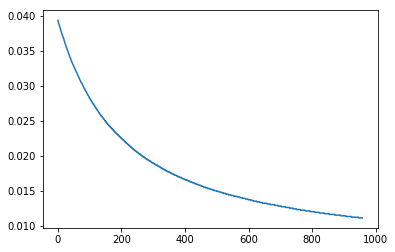

In [16]:
plt.plot(loss[200:])
plt.show()